In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import Tk

In [2]:
csv_file_paths = filedialog.askopenfilenames(
    title="Select CSV Files",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [3]:
color_blue = "#00274c"
color_red = "#c61a3e"

In [4]:
pixels_to_nm = 117
pixels_to_um = 0.117
threshold_R2 = 0.6
threshold_mean_step_size_nm = 30

In [8]:
all_data = []

# Process each CSV file
for csv_file_path in csv_file_paths:
    # Read the data
    data = pd.read_csv(csv_file_path)

    # Convert mean_step_sizes from pixels to nanometers
    data.loc[:, "mean_step_sizes_nm"] = data["mean_step_sizes"] * pixels_to_nm
    
    # Convert step_sizes from pixels to micrometers
    data.loc[:, "step_sizes_um"] = data["step_sizes"] * pixels_to_um

    # Filter based on R2 and mean_step_sizes in nanometers
    filtered_data = data.loc[(data["R2"] > threshold_R2) & (data["mean_step_sizes_nm"] > threshold_mean_step_size_nm)]

    # Ensure step_flag is boolean
    filtered_data.loc[:, 'step_flag'] = filtered_data['step_flag'].astype(str).str.upper() == 'TRUE'
    
    # Append the filtered data to the list
    all_data.append(filtered_data)


In [9]:
combined_data = pd.concat(all_data, ignore_index=True)

# Filter the flagged and non-flagged data
flagged = combined_data[combined_data['step_flag']]
not_flagged = combined_data[~combined_data['step_flag']]

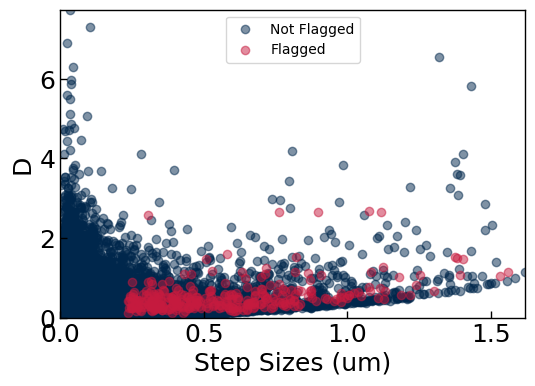

In [10]:
plt.figure(figsize=(6, 4))
plt.scatter(
    not_flagged['step_sizes_um'], not_flagged['D'], alpha=0.5, 
    label='Not Flagged', color=color_blue
)
plt.scatter(
    flagged['step_sizes_um'], flagged['D'], alpha=0.5, 
    label='Flagged', color=color_red
)

# Customize the axes limits based on combined data
plt.xlim(0, combined_data['step_sizes_um'].max())
plt.ylim(0, combined_data['D'].max())

# Customize labels
plt.xlabel("Step Sizes (um)", fontsize=18)
plt.ylabel("D", fontsize=18)

# Set the legend
plt.legend()

# Customize plot appearance
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)

# Save the plot
plt.savefig("combined_scatter.png", format="png", bbox_inches="tight", dpi=300)

# Show the plot
plt.show()